In [1]:
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [3]:
# Import the training set
dataset_train = pd.read_excel('A(塑化).xlsx')  # 讀取訓練集
dataset_test = pd.read_excel('A(塑化)_測試.xlsx')
data_all = pd.concat((dataset_train,dataset_test), axis = 0)
data_all=data_all.fillna(method="ffill",limit=10)
#dataset_train=dataset_train.dropna(axis=1)
training_set = data_all.iloc[:,[3,21,31,32,33,34,36,41,42,43,44,45,46]]#.values  # 取欄位值
training_set1= data_all.iloc[:, 1:2].values

C:\Users\j2722\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [4]:
real_stock_price =data_all.iloc[2100:2232,1].values

In [5]:
train = data_all.iloc[:2100,[3,21,31,32,33,34,36,41,42,43,44,45,46]]

In [6]:
#train

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc1.fit_transform(training_set1)

TypeError: float() argument must be a string or a number, not 'NaTType'

In [313]:
#res = sc.transform(res) # Feature Scaling

In [360]:
X_train = []   
y_train = []   
for i in range(7, 2100):  # 2100 是訓練集總數
    X_train.append(training_set_scaled[i-7:i,:])
    y_train.append(training_set_scaled1[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2], 1))
# Import the Keras libraries and packages

# Initialising the RNN
regressor = Sequential()

In [361]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2093/2093 [==============================] - 15s 7ms/step - loss: 0.0211
Epoch 2/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0071
Epoch 3/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0065
Epoch 4/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0066
Epoch 5/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0066
Epoch 6/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0072
Epoch 7/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0066
Epoch 8/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0061
Epoch 9/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0056
Epoch 10/100
2093/2093 [==============================] - 11s 5ms/step - loss: 0.0058
Epoch 11/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0032
Epoch 12/100
2093/2093 [==============================] - 10s 5ms/

Epoch 94/100
2093/2093 [==============================] - 9s 4ms/step - loss: 6.4562e-04
Epoch 95/100
2093/2093 [==============================] - 9s 4ms/step - loss: 6.0692e-04
Epoch 96/100
2093/2093 [==============================] - 10s 5ms/step - loss: 6.5624e-04
Epoch 97/100
2093/2093 [==============================] - 9s 5ms/step - loss: 5.6849e-04
Epoch 98/100
2093/2093 [==============================] - 9s 4ms/step - loss: 5.9803e-04
Epoch 99/100
2093/2093 [==============================] - 9s 4ms/step - loss: 6.5556e-04
Epoch 100/100
2093/2093 [==============================] - 9s 4ms/step - loss: 6.3392e-04


In [364]:
X_test=[]
for i in range(2101, 2232):  # 1747 是訓練集總數
    X_test.append(training_set_scaled[i-7:i,0:])

In [365]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2], 1))

IndexError: tuple index out of range

In [345]:
predicted_stock_price = regressor.predict(X_test)

In [346]:
predicted_stock_price = sc1.inverse_transform(predicted_stock_price)

Text(0,0.5,'A Price')

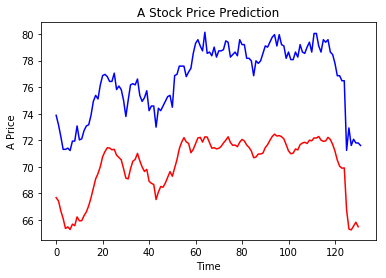

In [366]:
plt.plot(predicted_stock_price,color='red',label= 'predicted_stock_price')
plt.plot(real_stock_price,color = 'blue',label='real_stock_price')
plt.title('A Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('A Price')